# 데이터 분석 실무
## 파이썬 라이브러리를 활용해서 통계 기법을 적용한 데이터 분석을 배우는 과정입니다.

#### 상관분석1 : 마케팅 데이터 분석(Pandas 활용)

* 지금부터 간단한 예시코드를 중심으로 데이터 분석 실습을 진행하겠습니다.

* 마케팅 데이터에서 변수간 상관분석을 위한 가상 데이터셋을 만들어보겠습니다.
* A 제조기업에서는 서비스별 마케팅 관련 데이터를 수집하고 있습니다. 여러 변수를 수집하고 있는데요. 각 변수간 상관관계가 궁금합니다.

    * Advertising: 광고 노출
    * Sales: 판매량
    * Website_Traffic: 웹사이트 내 서비스 페이지 트래픽
    * Social_Media: 소셜미디어 업로드 수
    * Email_Campaign: 이메일 캠페인 횟수

##### 0. 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. 데이터 생성

In [2]:
# 마케팅 데이터를 포함한 데이터프레임 생성
np.random.seed(0)

# Advertising 데이터 생성
advertising = np.random.randint(1000, 2000, 100)
# Sales 데이터 생성
sales = np.random.randint(100, 500, 100)
# Website_Traffic 데이터 생성
website_traffic = np.random.randint(5000, 10000, 100)
# Social_Media 데이터 생성
social_media = np.random.randint(100, 1000, 100)
# Email_Campaign 데이터 생성
email_campaign = np.random.randint(0, 5, 100)

# 데이터프레임 생성
data = pd.DataFrame({
    'Advertising': advertising,
    'Sales': sales,
    'Website_Traffic': website_traffic,
    'Social_Media': social_media,
    'Email_Campaign': email_campaign
})

##### 2. 상관계수 계산

In [3]:
# 데이터프레임의 변수 간 상관계수 계산
correlation_matrix = data.corr()

In [4]:
# 상관계수 출력
print(correlation_matrix)

                 Advertising     Sales  Website_Traffic  Social_Media  \
Advertising         1.000000 -0.111324        -0.164997      0.079374   
Sales              -0.111324  1.000000         0.041739     -0.158440   
Website_Traffic    -0.164997  0.041739         1.000000      0.036346   
Social_Media        0.079374 -0.158440         0.036346      1.000000   
Email_Campaign      0.032651 -0.214387         0.200311      0.227363   

                 Email_Campaign  
Advertising            0.032651  
Sales                 -0.214387  
Website_Traffic        0.200311  
Social_Media           0.227363  
Email_Campaign         1.000000  


##### 3. 시각화

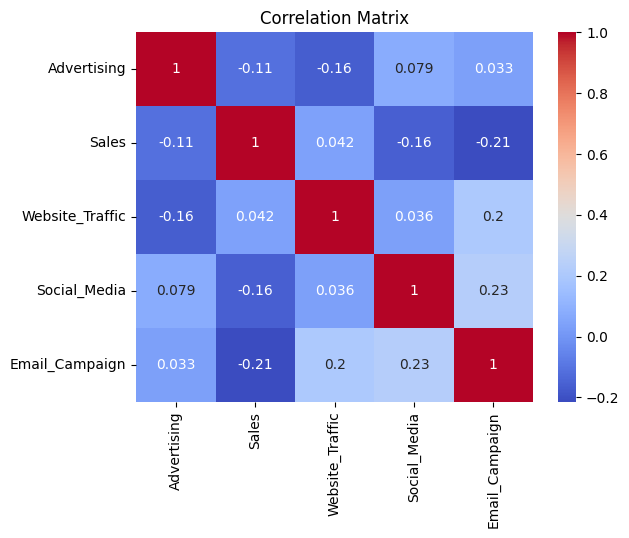

In [5]:
# 상관계수를 히트맵으로 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 상관분석2 : 마케팅 데이터 분석(stats 활용)

* 지금부터 간단한 예시코드를 중심으로 데이터 분석 실습을 진행하겠습니다.

* 마케팅 데이터에서 변수간 상관분석을 위한 가상 데이터셋을 만들어보겠습니다.
* A 제조기업에서는 서비스별 마케팅 관련 데이터를 수집하고 있습니다. 여러 변수를 수집하고 있는데요. 각 변수간 상관관계가 궁금합니다.

    * Advertising: 광고 노출
    * Sales: 판매량
    * Website_Traffic: 웹사이트 내 서비스 페이지 트래픽
    * Social_Media: 소셜미디어 업로드 수
    * Email_Campaign: 이메일 캠페인 횟수

##### 0. 필요 라이브러리 불러오기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##### 1. 데이터 생성

In [7]:
# 마케팅 데이터를 포함한 데이터프레임 생성
np.random.seed(0)

# Advertising 데이터 생성
advertising = np.random.randint(1000, 2000, 100)
# Sales 데이터 생성
sales = np.random.randint(100, 500, 100)
# Website_Traffic 데이터 생성
website_traffic = np.random.randint(5000, 10000, 100)
# Social_Media 데이터 생성
social_media = np.random.randint(100, 1000, 100)
# Email_Campaign 데이터 생성
email_campaign = np.random.randint(0, 5, 100)

# 데이터프레임 생성
data = pd.DataFrame({
    'Advertising': advertising,
    'Sales': sales,
    'Website_Traffic': website_traffic,
    'Social_Media': social_media,
    'Email_Campaign': email_campaign
})

##### 2. 상관계수 & p-value 계산

In [26]:
# 변수 간 상관계수와 p-value 계산
correlation_matrix = np.zeros((len(data.columns), len(data.columns)))
p_values = np.zeros((len(data.columns), len(data.columns)))

for i, column1 in enumerate(data.columns):
    for j, column2 in enumerate(data.columns):
        correlation, p_value = stats.pearsonr(data[column1], data[column2])
        correlation_matrix[i, j] = correlation
        p_values[i, j] = p_value

In [12]:
# 상관계수와 p-value 출력
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)
p_value_df = pd.DataFrame(p_values, columns=data.columns, index=data.columns)

print("Correlation Matrix:")
print(correlation_df)

print("\np-values:")
print(p_value_df)

Correlation Matrix:
                 Advertising     Sales  Website_Traffic  Social_Media  \
Advertising         1.000000 -0.111324        -0.164997      0.079374   
Sales              -0.111324  1.000000         0.041739     -0.158440   
Website_Traffic    -0.164997  0.041739         1.000000      0.036346   
Social_Media        0.079374 -0.158440         0.036346      1.000000   
Email_Campaign      0.032651 -0.214387         0.200311      0.227363   

                 Email_Campaign  
Advertising            0.032651  
Sales                 -0.214387  
Website_Traffic        0.200311  
Social_Media           0.227363  
Email_Campaign         1.000000  

p-values:
                 Advertising     Sales  Website_Traffic  Social_Media  \
Advertising         0.000000  0.270167         0.100904      0.432456   
Sales               0.270167  0.000000         0.680104      0.115385   
Website_Traffic     0.100904  0.680104         0.000000      0.719589   
Social_Media        0.432456  0.11

##### 3. 시각화

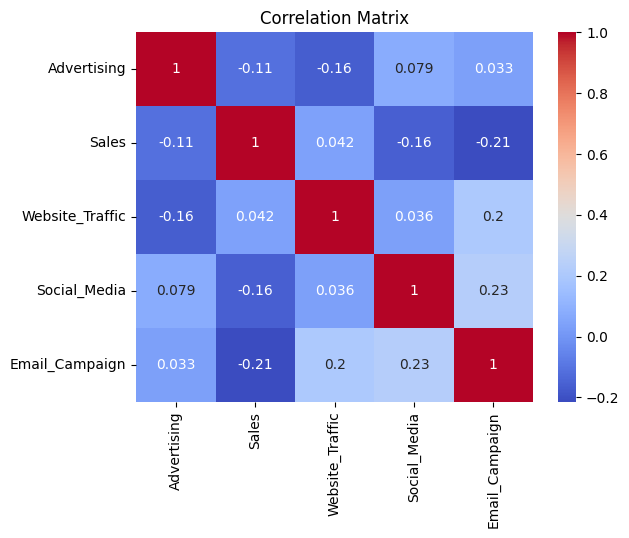

In [13]:
# 상관계수를 히트맵으로 시각화
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

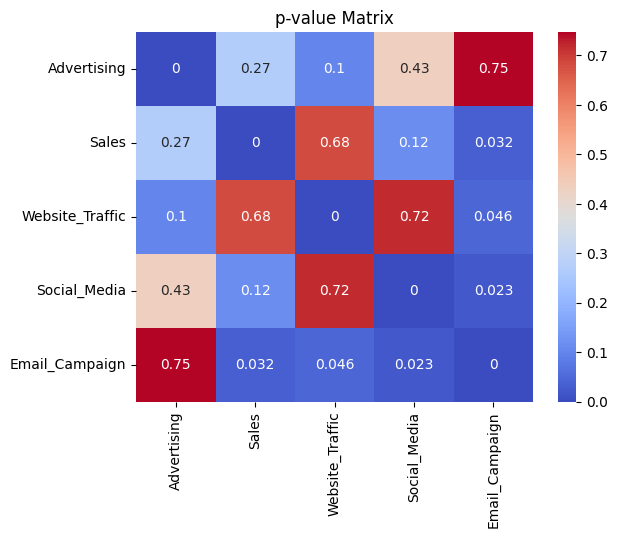

In [14]:
# p-value를 히트맵으로 시각화
sns.heatmap(p_value_df, annot=True, cmap='coolwarm')
plt.title('p-value Matrix')
plt.show()